In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [121]:
wine_dataset=pd.read_csv('./winequalityN.csv')

In [4]:
wine_dataset.shape

(6497, 13)

In [147]:
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


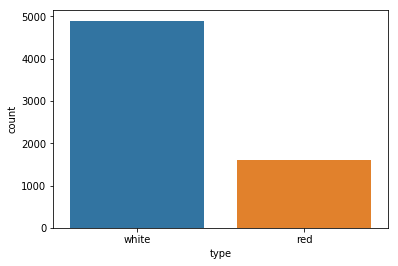

In [148]:
sb.countplot(x='type',data=wine_dataset)

Pre Processing 

In [6]:
new_data=wine_dataset.drop(columns=['type'])
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [68]:
new_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [60]:
new_data.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
new_data['fixed acidity'] = new_data['fixed acidity'].fillna(new_data['fixed acidity'].mean())
new_data['volatile acidity'] = new_data['volatile acidity'].fillna(new_data['volatile acidity'].mean())
new_data['citric acid'] = new_data['citric acid'].fillna(new_data['citric acid'].mean())
new_data['residual sugar'] = new_data['residual sugar'].fillna(new_data['residual sugar'].mean())
new_data['chlorides'] = new_data['chlorides'].fillna(new_data['chlorides'].mean())
new_data['pH'] = new_data['pH'].fillna(new_data['pH'].mean())
new_data['sulphates'] = new_data['sulphates'].fillna(new_data['sulphates'].mean())


In [9]:
new_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Visualization

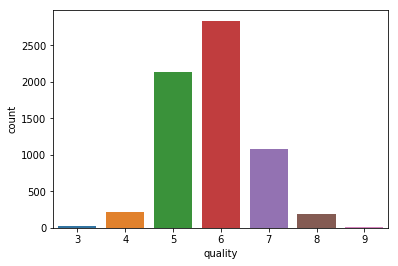

In [60]:
sb.countplot(x='quality',data=new_data)
# sb.catplot(data=new_data,x='quality',kind='count')
# plt.show()
# sb

In [62]:
correlation=new_data.corr()

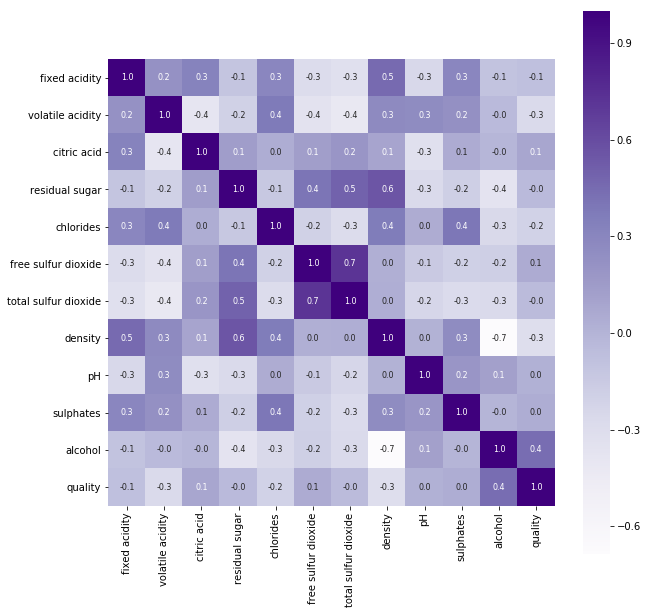

In [143]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Purples')

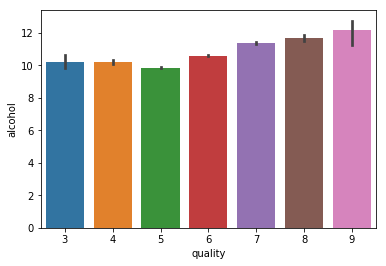

In [146]:
sb.barplot(new_data['quality'],new_data['alcohol'])

# alcohol and wine are directly proportional
# wine having > 6.5 quality is good wine

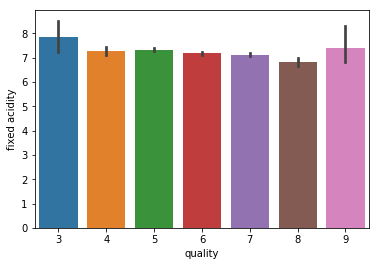

In [150]:
sb.barplot(new_data['quality'],new_data['fixed acidity'])

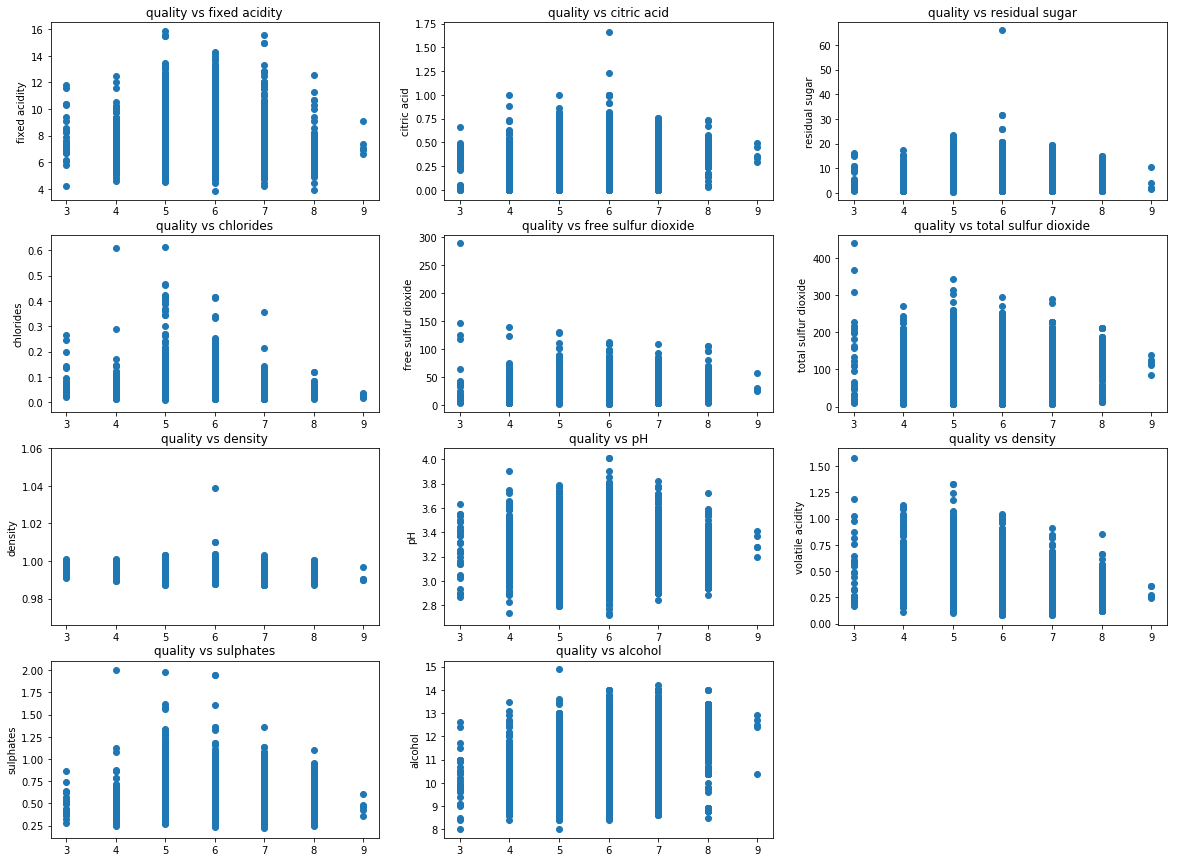

In [160]:
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
plt.title('quality vs fixed acidity')
# plt.xlabel("quality")
plt.ylabel("fixed acidity")
plt.scatter(new_data['quality'],new_data['fixed acidity'])

plt.subplot(4,3,2)
plt.title('quality vs citric acid')
# plt.xlabel("quality")
plt.ylabel("citric acid")
plt.scatter(new_data['quality'],new_data['citric acid'])

plt.subplot(4,3,3)
plt.title('quality vs residual sugar')
# plt.xlabel("quality")
plt.ylabel("residual sugar")
plt.scatter(new_data['quality'],new_data['residual sugar'])

plt.subplot(4,3,4)
plt.title('quality vs chlorides')
# plt.xlabel("quality")
plt.ylabel("chlorides")
plt.scatter(new_data['quality'],new_data['chlorides'])

plt.subplot(4,3,5)
plt.title('quality vs free sulfur dioxide')
# plt.xlabel("quality")
plt.ylabel("free sulfur dioxide")
plt.scatter(new_data['quality'],new_data['free sulfur dioxide'])

plt.subplot(4,3,6)
plt.title('quality vs total sulfur dioxide')
# plt.xlabel("quality")
plt.ylabel("total sulfur dioxide")
plt.scatter(new_data['quality'],new_data['total sulfur dioxide'])

plt.subplot(4,3,7)
plt.title('quality vs density')
# plt.xlabel("quality")
plt.ylabel("density")
plt.scatter(new_data['quality'],new_data['density'])

plt.subplot(4,3,8)
plt.title('quality vs pH')
# plt.xlabel("quality")
plt.ylabel("pH")
plt.scatter(new_data['quality'],new_data['pH'])

plt.subplot(4,3,9)
plt.title('quality vs density')
# plt.xlabel("quality")
plt.ylabel("volatile acidity")
plt.scatter(new_data['quality'],new_data['volatile acidity'])

plt.subplot(4,3,10)
plt.title('quality vs sulphates')
# plt.xlabel("quality")
plt.ylabel("sulphates")
plt.scatter(new_data['quality'],new_data['sulphates'])

plt.subplot(4,3,11)
plt.title('quality vs alcohol')
# plt.xlabel("quality")
plt.ylabel("alcohol")
plt.scatter(new_data['quality'],new_data['alcohol'])

plt.show()

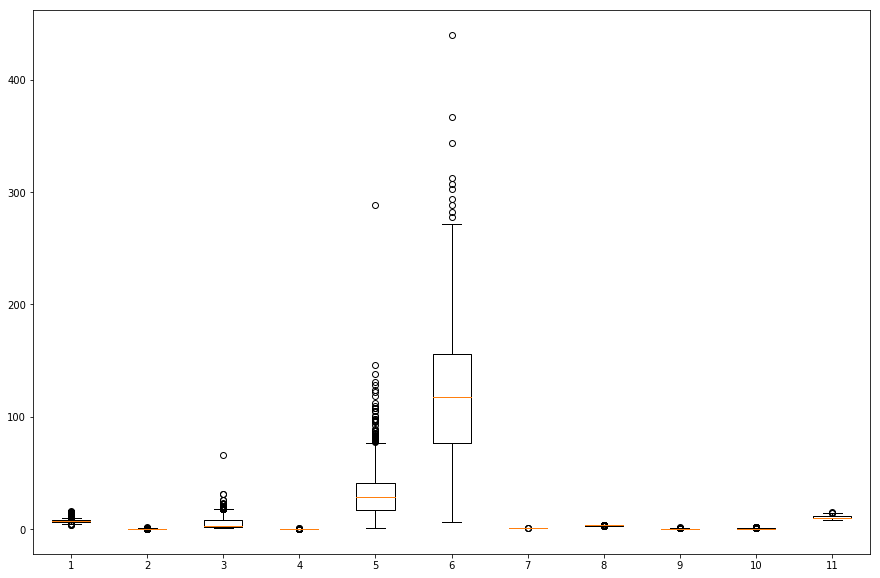

In [156]:
plt.figure(figsize=(15,10))
x=new_data['quality']
y1=new_data['fixed acidity']
y2=new_data['citric acid']  
y3=new_data['residual sugar']
y4=new_data['chlorides']
y5=new_data['free sulfur dioxide']
y6=new_data['total sulfur dioxide']
y7=new_data['density']
y8=new_data['pH']
y9=new_data['volatile acidity']
y10=new_data['sulphates']
y11=new_data['alcohol']
plt.boxplot([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11])
plt.show()

Train and Test Split

In [77]:
X = new_data.drop('quality',axis=1)

In [79]:
Y = new_data['quality']

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [105]:
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (5197,) (1300,)


Decision Tree Classifier

model = DecisionTreeClassifier()

In [95]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [108]:
print('Accuracy for decision tree: ', test_data_accuracy)

Accuracy for decision tree:  0.6461538461538462


Random Forest Classifier

In [103]:
model1 = RandomForestClassifier()

In [110]:
model1.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy for random forest tree : ', test_data_accuracy)

Accuracy for random forest tree :  0.6630769230769231


In [161]:
input_data = (6.8,0.26,0.42,1.7,0.049,41,122,0.993,3.47,0.48,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (5<prediction[0]<=10):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[8]
Good Quality Wine


THANK YOU :) :)